In [41]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

### Let's try to compute AND operation using Mathematical function

<img src="nn_and.PNG" width="50%" height="50%">
<p> Credits: Andrew NG Machine Learning </p>

In [42]:
def function(x1,x2):
    #return -30 + x1 * 20 + 20 * x2
    return -0.5 + x1 * 0.5 + 0.5 * x2

def sigmoid_function(x):
    return 1/(1 + math.exp(-1 * x))

In [43]:
print("x1 = 0 and x2 = 0")
round(sigmoid_function(function(0,0)))

x1 = 0 and x2 = 0


0

In [44]:
print("x1 = 0 amd x2 = 1")
round(sigmoid_function(function(0,1)))

x1 = 0 amd x2 = 1


0

In [45]:
print("x1 = 1 amd x2 = 0")
round(sigmoid_function(function(1,0)))

x1 = 1 amd x2 = 0


0

In [46]:
print("x1 = 1 amd x2 = 1")
round(sigmoid_function(function(1,1)))

x1 = 1 amd x2 = 1


1

### As you have seen above the mathematical function was able to compute and function
### Let's try to implement a Simple Neural Network with out a hidden layer and check it it's able to compute a AND function by adjusting the weights automatically

#### We will create a neural network with
- 2 inputs layers
- 0 hidden layers
- 1 output layer

In [47]:
#x inputs
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

#x output
y_output = np.array([0.0,0.0,0.0,1.0])

In [48]:
print("============input==========")
print(X)

print("===========output==========")
print(y_output)

============input==========
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
===========output==========
[0. 0. 0. 1.]


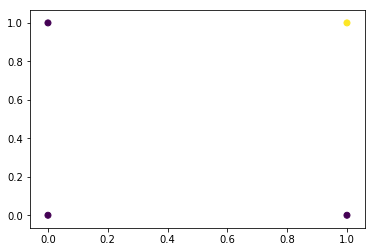

In [49]:
plt.scatter(X[:,0],X[:,1],c=y_output,label=['zero','one'])
plt.show()

In [50]:
#instead of using sigmoid we can use check function as well
def check(x):
    return tf.to_float(tf.greater(x,0.5))

In [51]:
sess = tf.Session()

#Let's call weights of the input layer w and bias be b
X = tf.convert_to_tensor(X, dtype=tf.float32)
y_output = tf.reshape(tf.convert_to_tensor(y_output, dtype=tf.float32), [4,1])
w = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32,name="weights")
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32,name="bias")

#output
output = tf.sigmoid(tf.add(tf.matmul(X,w),b))
error = tf.subtract(y_output, output)
mse = tf.reduce_mean(tf.square(error))
delta = tf.matmul(tf.transpose(X), error)
adder = tf.add(w, delta)
train = tf.assign(w, adder)


sess.run(tf.global_variables_initializer())

In [52]:
#err, target = 1, 0
epoch, max_epochs = 0, 1000

while epoch < max_epochs:
    epoch += 1
    err, _ = sess.run([mse, train])
print('epoch:', epoch, 'mse:', err)

Weights = np.array(sess.run(w))
bias = np.array(sess.run(b))

print(Weights)
print(bias)

epoch: 1000 mse: 0.25848317
[[-0.04475254]
 [-0.04475254]]
[0.06712872]


In [53]:
X_input = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

def sigmoid_function(x):
    return 1/(1 + np.exp(-1 * x))
print(sigmoid_function(np.matmul(X_input,Weights) + bias))
print(np.round(sigmoid_function(np.matmul(X_input,Weights) + bias)))

[[0.51677588]
 [0.50559381]
 [0.50559381]
 [0.49440614]]
[[1.]
 [1.]
 [1.]
 [0.]]


In [54]:
sess.close()

### Next we will try to implement the above code using gradient descent optimizers and trying to reduce the loss

In [55]:
#we will use graph here
#a default graph even if we don't create a any graph
graph1 = tf.Graph()
#with graph1.as

In [103]:
#with graph1.as_default():
X = tf.constant([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=tf.float32, name = "X")
y_output = tf.constant([0.0,0.0,0.0,1.0], dtype=tf.float32, name="y_output")

#X = tf.constant([[0,0],[0,1],[1,0],[1,1]], dtype=tf.int8, name = "X")
#y_output = tf.constant([0,0,0,1], dtype=tf.int8, name="y_output")

b = 10 * tf.Variable(tf.random_normal([1],stddev = 1.0 , mean=0.0),dtype=tf.float32,name="bias")
#w = tf.Variable(tf.random_normal([2, 1] ,stddev = 1.0 , mean=0.0), dtype=tf.float32,name="weights")
w1 = 10 * tf.Variable(tf.random_normal([1,1] ,stddev = 1.0 , mean=0.0), dtype=tf.float32,name="weights")
w2 = 10 * tf.Variable(tf.random_normal([1,1] ,stddev = 1.0 , mean=0.0), dtype=tf.float32,name="weights")
w = tf.concat([w1,w2],0)

#output = tf.math.sign(tf.add(tf.matmul(X,w),b))
output = tf.sigmoid(tf.add(tf.matmul(X,w),b))
#mse = tf.subtract(y_output, output)
error = tf.subtract(y_output, output)
mse = tf.reduce_mean(tf.square(error))
optimizer = tf.train.GradientDescentOptimizer(0.8)
train = optimizer.minimize(mse)

In [104]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
mse_values = 1
mse_val = []
max_epochs = 100
epochs = 0
while  max_epochs > epochs and mse_values > 0.17:
#while mse_values > 0.17:
    #_,mse_values = sess.run()
    _,mse_values = sess.run([train,mse])
    mse_val.append(mse_values)
    #print(mse_values)
    epochs += 1
bias = sess.run(b)
#Weights = np.array([sess.run(w1),sess.run(w2)])
Weights = np.array(sess.run(w))

print(bias)
print(Weights)
print(mse_values)
print(epochs)

[9.049087]
[[-0.56193495]
 [ 4.354837  ]]
0.74987876
100


In [105]:
X_input = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

def sigmoid_function(x):
    return 1/(1 + np.exp(-1 * x))
print(np.matmul(X_input,Weights) + bias)
print(sigmoid_function(np.matmul(X_input,Weights) + bias))
np.round(sigmoid_function(np.matmul(X_input,Weights) + bias))


[[ 9.04908657]
 [13.40392351]
 [ 8.48715162]
 [12.84198856]]
[[0.99988252]
 [0.99999849]
 [0.99979394]
 [0.99999735]]


array([[1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
sess.close()

with tf.Session(graph=graph1) as sess:
    sess.run(init)
    mse_val = []
    for step in range(20):
        #_,mse_values = sess.run()
        sess.run([train,mse,error,output])
        #mse_val.append(mse_values)
        #print(mse_values)

In [ ]:
help (tf.random_normal)

In [ ]:
round(sigmoid_function(0.4))